In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/Users/Tim/PycharmProjects/HOI/')

In [3]:
import sys
sys.path

['/Users/tim/PycharmProjects/HOI/examples',
 '/Users/tim/opt/anaconda3/lib/python39.zip',
 '/Users/tim/opt/anaconda3/lib/python3.9',
 '/Users/tim/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/tim/opt/anaconda3/lib/python3.9/site-packages',
 '/Users/tim/opt/anaconda3/lib/python3.9/site-packages/aeosa',
 '/Users/Tim/PycharmProjects/HOI/']

In [4]:
import os
os.getcwd()

'/Users/tim/PycharmProjects/HOI/examples'

In [5]:
import numba
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from ipywidgets import IntProgress

In [6]:
from synthetic_data import stationary_pb_ts, nonstationary_ts_n, stationary_pb_ts_n
from HOI.preprocessings import compute_kernel, compute_kernel_n
from HOI.tests import test_independence

In [7]:
import matplotlib.pyplot as plt

def plot_test(data, mode):
    x = np.arange(0.1, 1, 0.1)
    y = np.array(data)

    fig = plt.figure(dpi=800)
    ax = fig.add_subplot(111)
    ax.set_ylim(0,1.05)
    ax.set_xlabel('dependence coefficient')
    ax.set_ylabel(mode)
    ax.set_title(mode + ' of dHSIC independence tests')
    plt.plot(x,y, marker='o', color='b')
    for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j))
    plt.show()

# triangle

## case2, z = x+y, gt_rejects = [1, 0, 1, 1]

In [12]:
power ={}
for d in tqdm(np.arange(0.1, 1, 0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        d1, d2, _, d3 = nonstationary_ts_n(n_sample=300, t_time=10, d=d, mode='case2', a=0.5, order=3)
        kd1 = compute_kernel_n(d1)
        kd2 = compute_kernel_n(d2)
        kd3 = compute_kernel_n(d3)
        _, _, _, reject = test_independence([kd1, kd2, kd3],None, mode = 'iid', n_perms=5000, alpha=0.05)
        rejects = rejects + reject + reject_1*2
    power[str(d)] = rejects/100
    print(power)
print(power)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.92}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.92, '0.2': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.92, '0.2': 1.0, '0.30000000000000004': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [15]:
power_new = {'0.1': 0.92, 
             '0.2': 1, 
             '0.3': 1, 
             '0.4': 1,
             '0.5': 1, 
             '0.6': 1,
             '0.7': 1, 
             '0.8': 1,
             '0.9': 1}

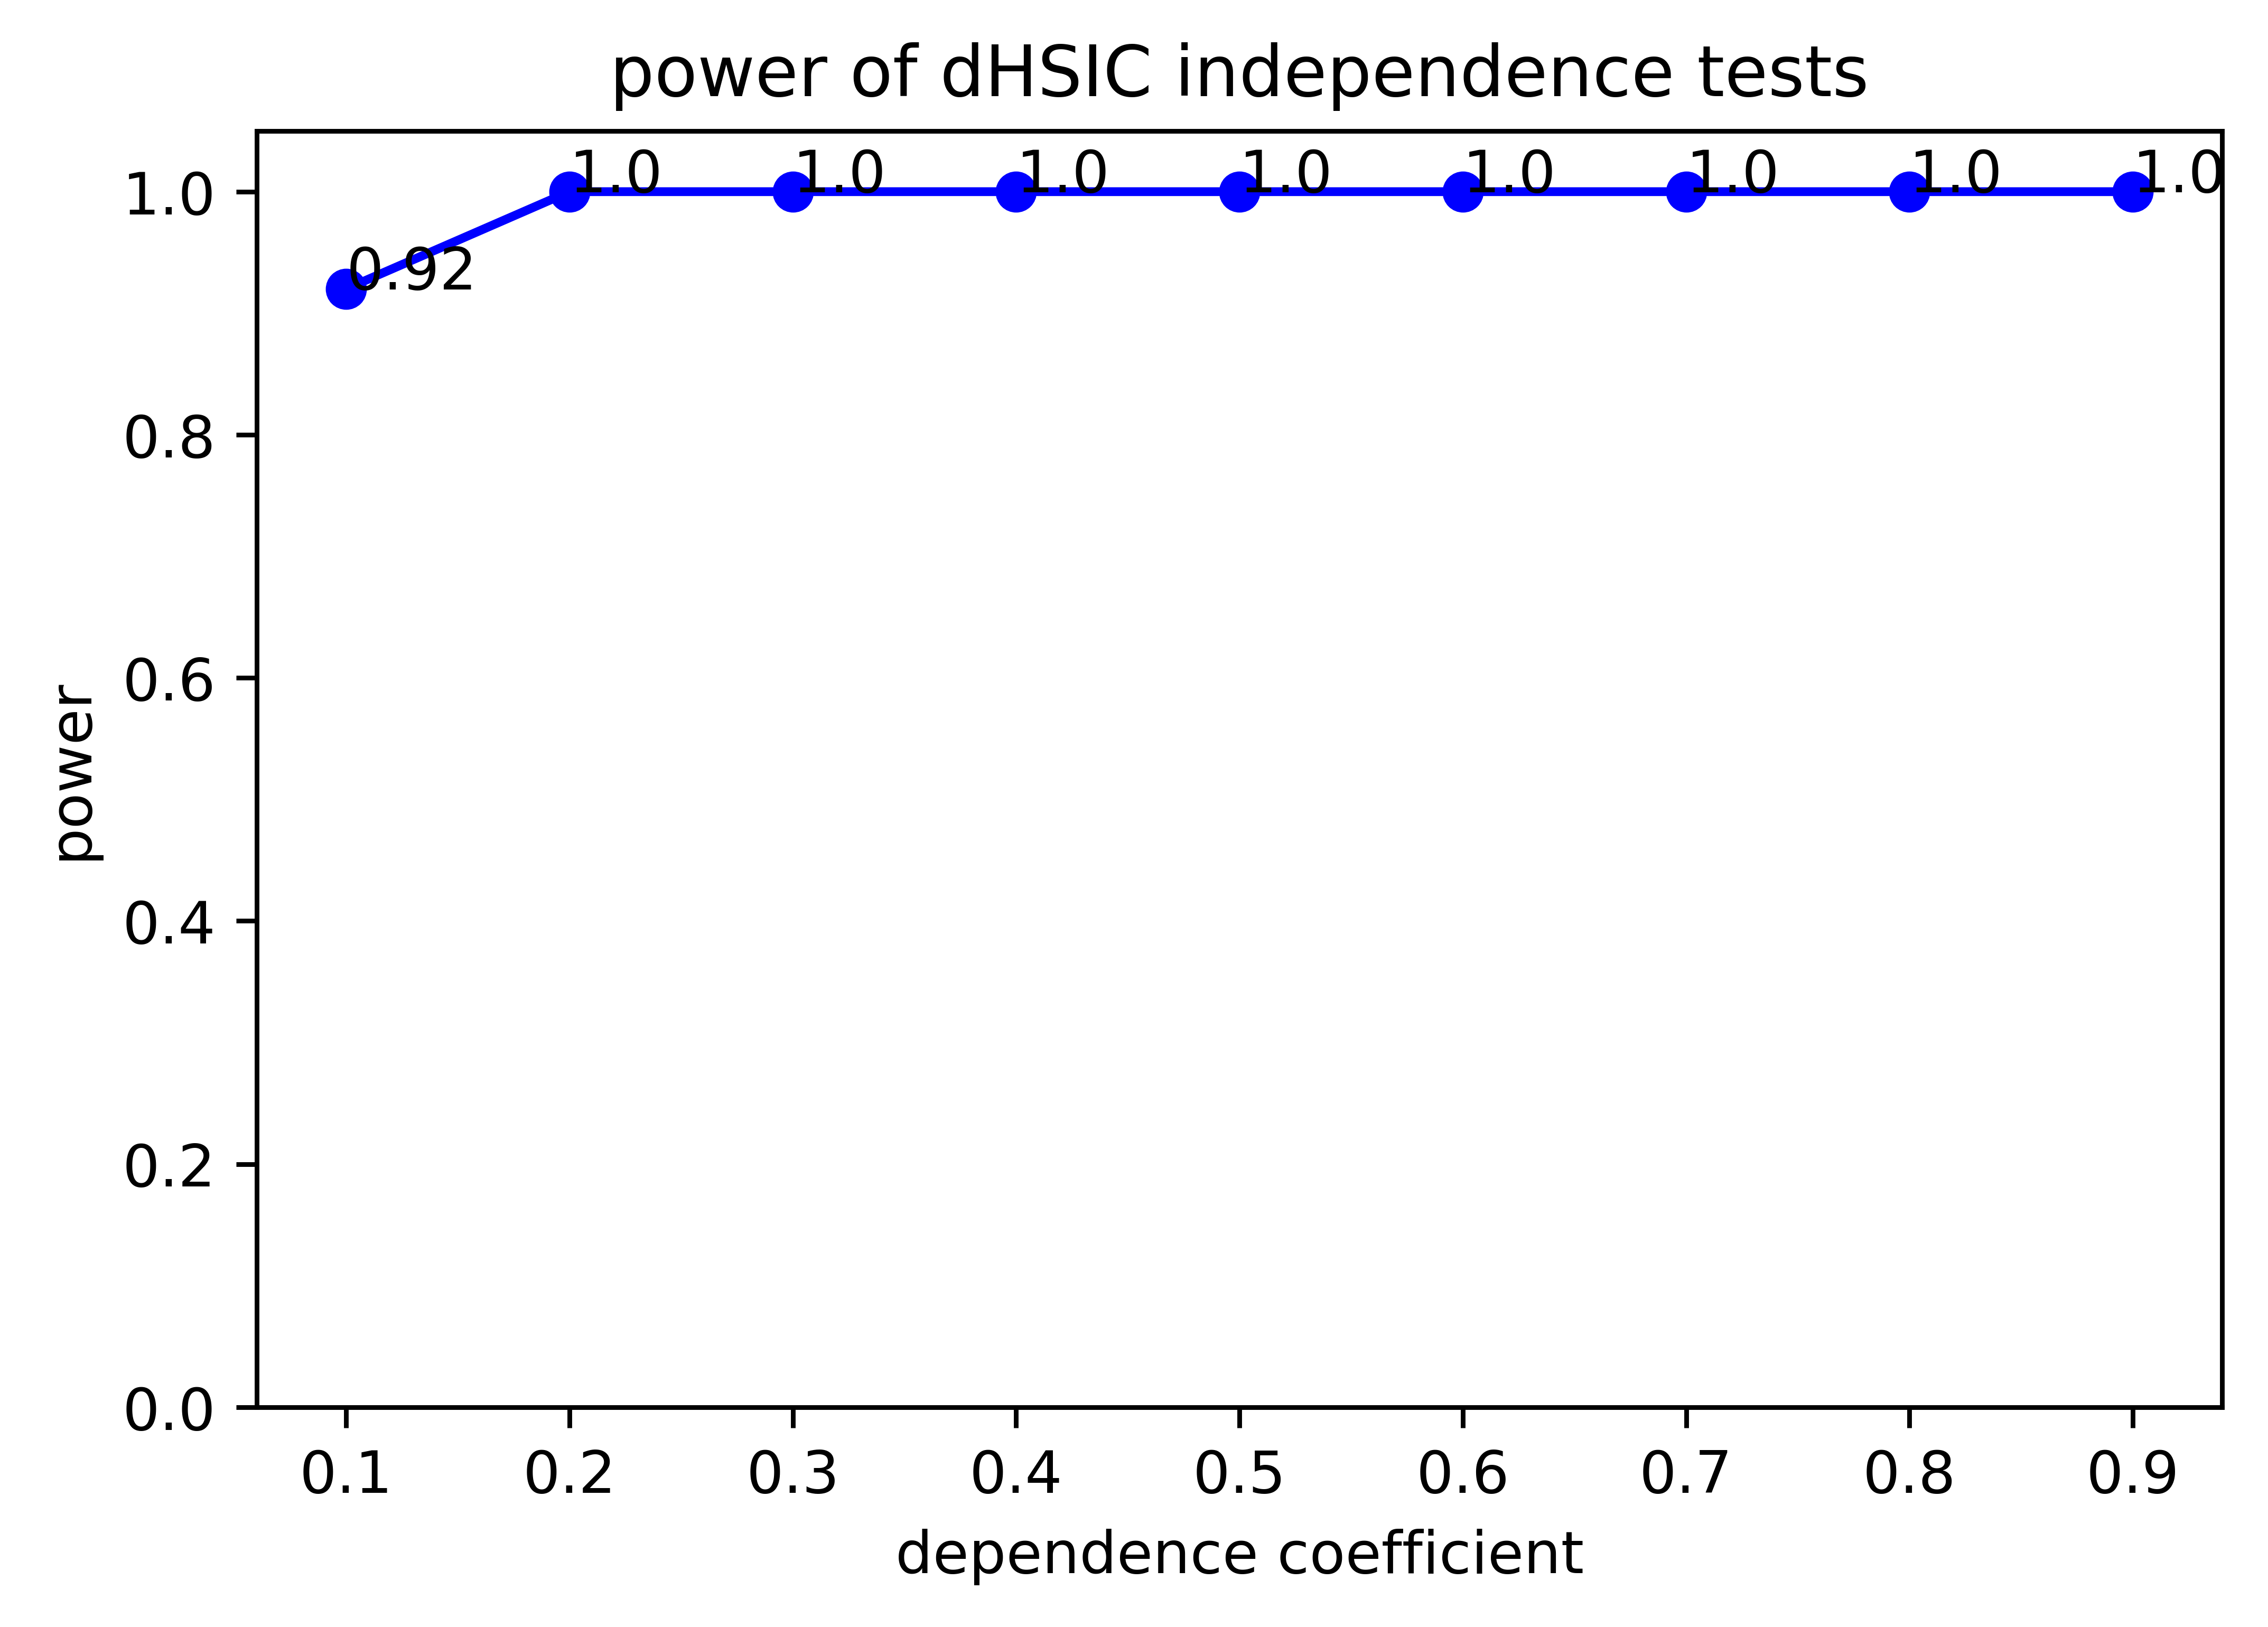

In [16]:
plot_test(list(power_new.values()), 'power')

In [11]:
power ={}
for d in tqdm(np.arange(0.2, 1, 0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        d1, d2, _, d3 = nonstationary_ts_n(n_sample=300, t_time=10, d=d, mode='case2', a=0.5, order=3)
        kd1 = compute_kernel_n(d1)
        kd3 = compute_kernel_n(d3)
        _, _, _, reject = test_independence([kd1, kd3],None, mode = 'iid', n_perms=5000, alpha=0.05)
        rejects = rejects + reject
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.2': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

# case1, z = xy, gt_rejects = [1, 0, 0, 0]

In [13]:
power ={}
for d in tqdm(np.arange(0.1, 1, 0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        d1, d2, _, d3 = nonstationary_ts_n(n_sample=300, t_time=10, d=d, mode='case1', a=0.5, order=3)
        kd1 = compute_kernel_n(d1)
        kd2 = compute_kernel_n(d2)
        kd3 = compute_kernel_n(d3)
        _, _, _, reject = test_independence([kd1, kd2, kd3],None,
                                                  mode = 'iid', n_perms=5000, alpha=0.05)
        
        rejects = rejects + reject
    power[str(d)] = rejects/100
    print(power)
print(power)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [17]:
power_new = {'0.9': 1, 
             '0.8': 1, 
             '0.7': 1, 
             '0.6': 1,
             '0.5': 1, 
             '0.4': 1,
             '0.3': 1, 
             '0.2': 1,
             '0.1': 1}

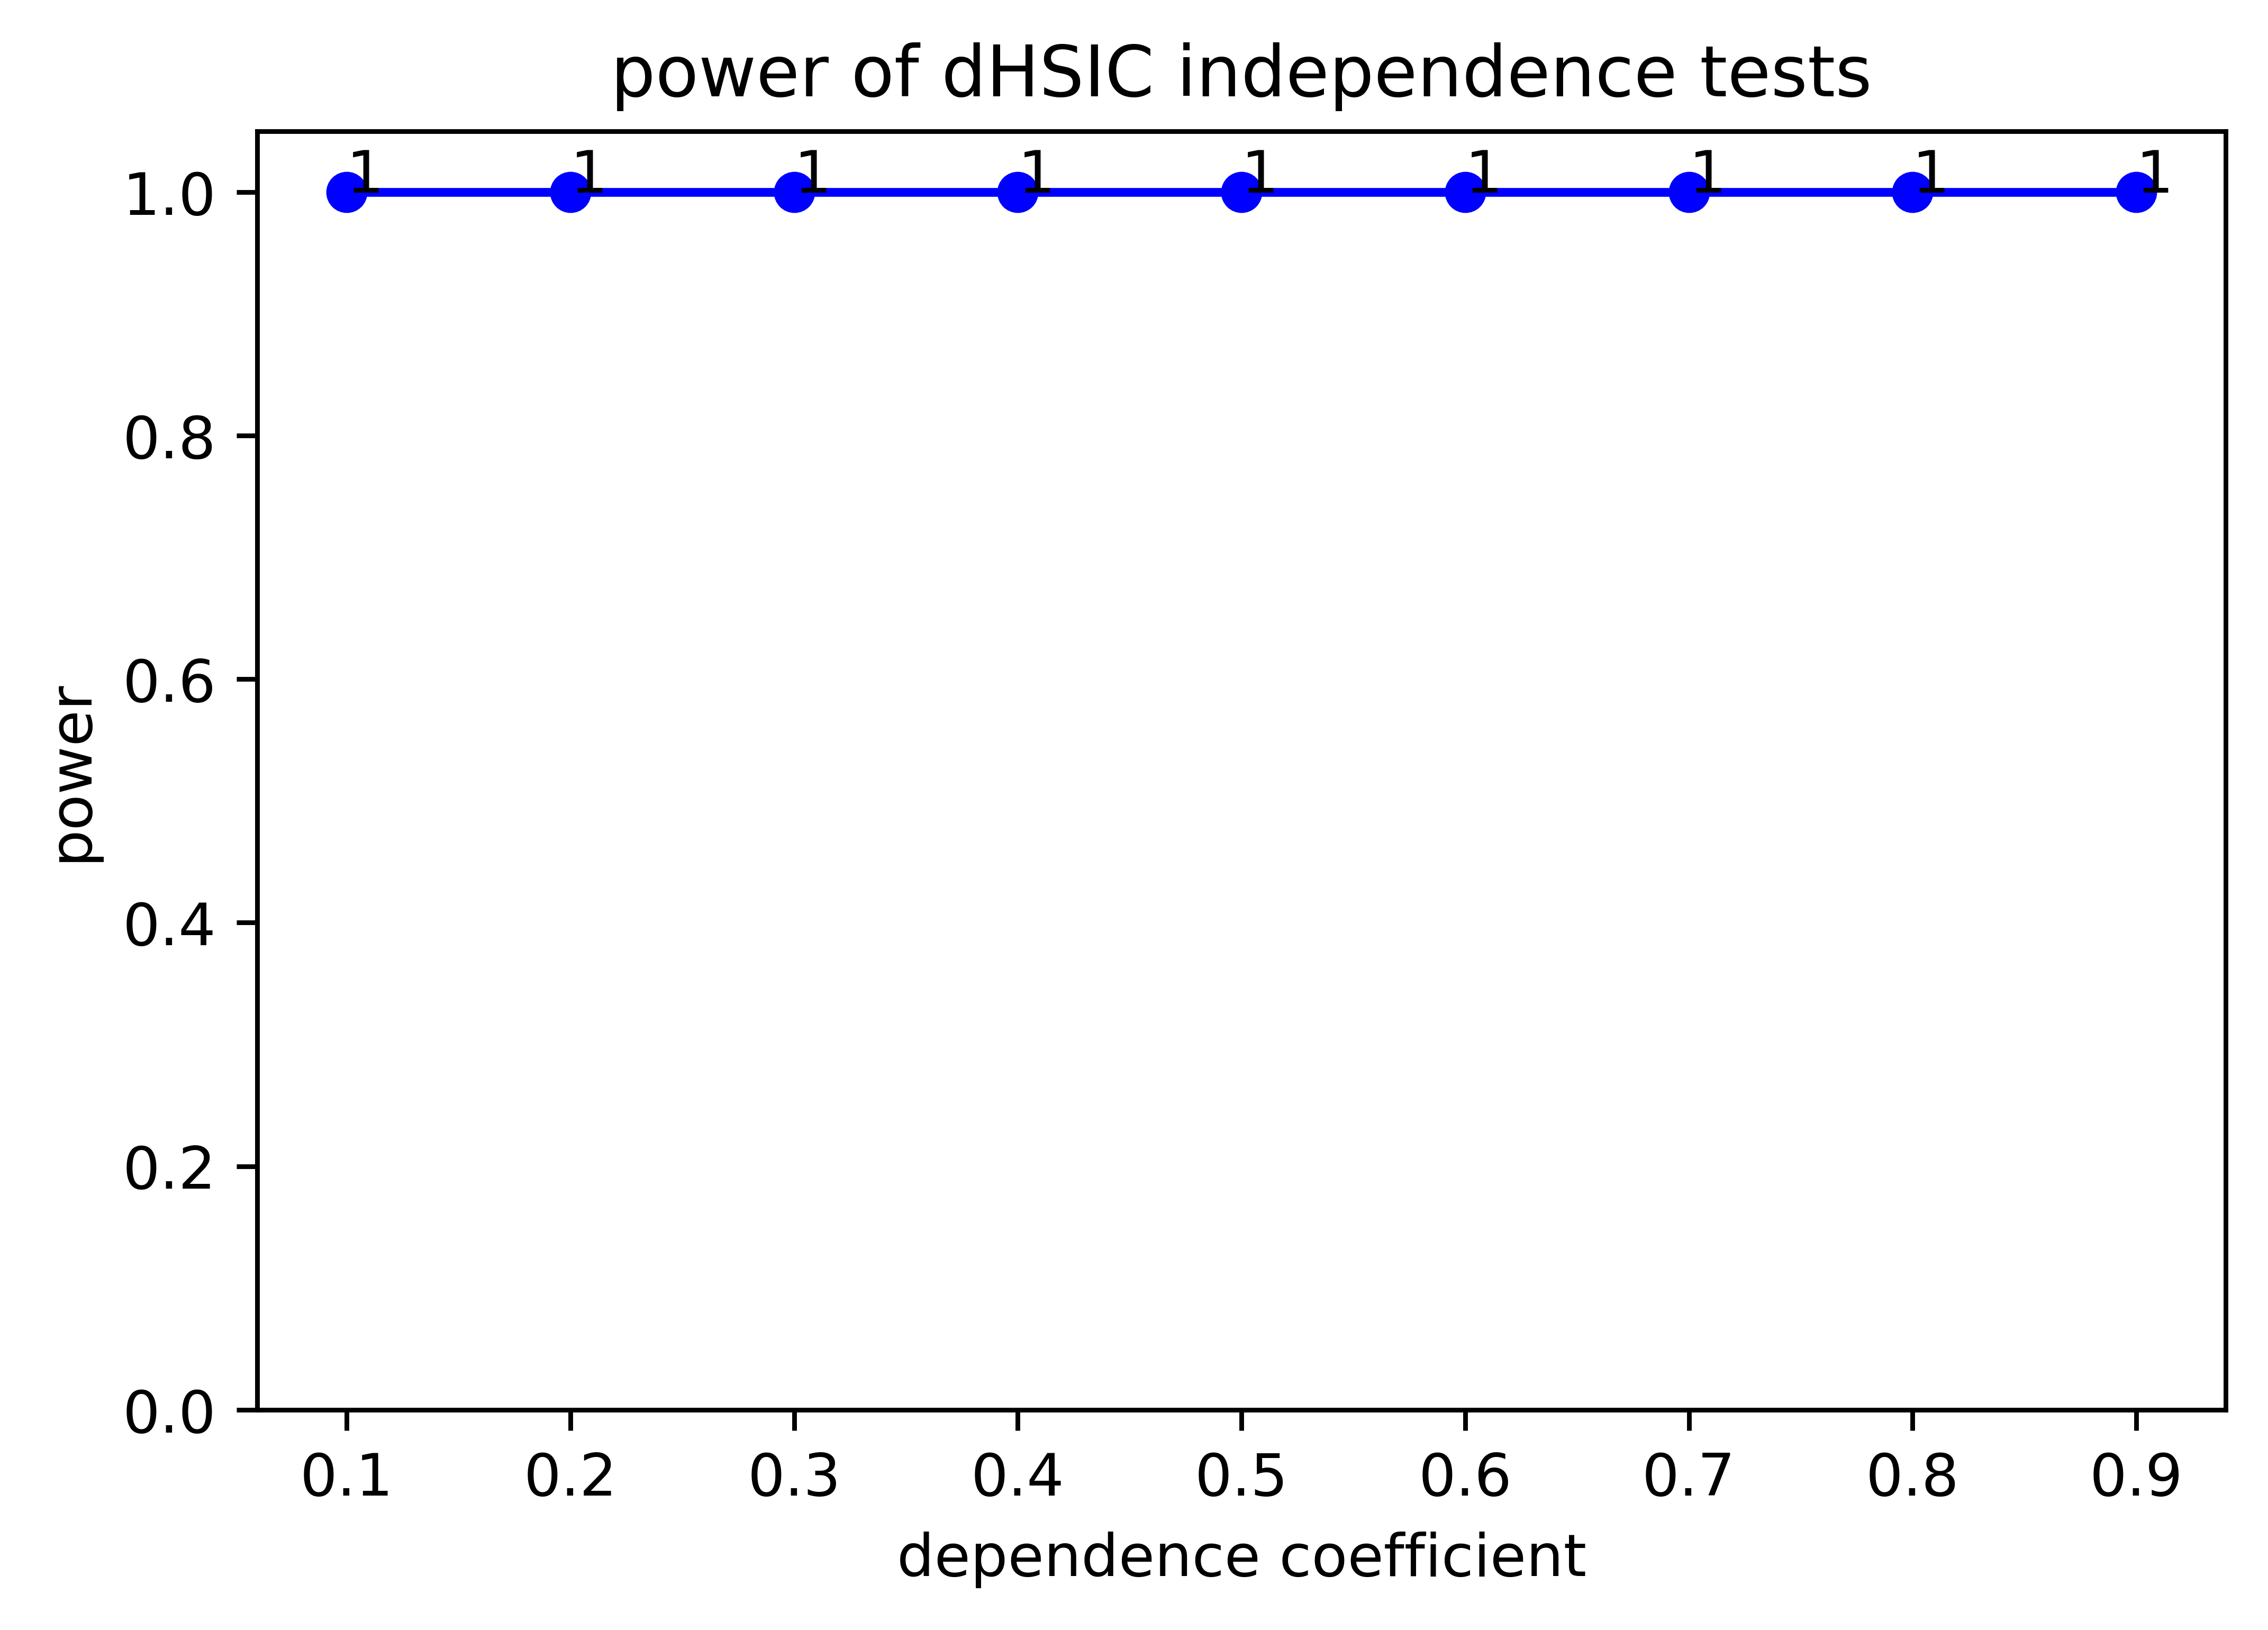

In [18]:
plot_test(list(power_new.values()), 'power')

## case 3, no edges, gt_rejects = [0, 0, 0, 0]

In [14]:
power ={}
for d in tqdm(np.arange(1, 0.1, -0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        d1, d2, _, d3 = nonstationary_ts_n(n_sample=300, t_time=10, d=0.5, mode='case3', a=d, order=3)
        kd1 = compute_kernel_n(d1)
        kd2 = compute_kernel_n(d2)
        kd3 = compute_kernel_n(d3)
        _, _, _, reject = test_independence([kd1, kd2, kd3],None,
                                                  mode = 'iid', n_perms=5000, alpha=0.05)
        rejects = rejects + reject
    power[str(d)] = rejects/100
    print(power)
print(power)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 0.07}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 0.07, '0.9': 0.02}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 0.07, '0.9': 0.02, '0.8': 0.05}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 0.07, '0.9': 0.02, '0.8': 0.05, '0.7000000000000001': 0.03}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 0.07, '0.9': 0.02, '0.8': 0.05, '0.7000000000000001': 0.03, '0.6000000000000001': 0.08}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 0.07, '0.9': 0.02, '0.8': 0.05, '0.7000000000000001': 0.03, '0.6000000000000001': 0.08, '0.5000000000000001': 0.06}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 0.07, '0.9': 0.02, '0.8': 0.05, '0.7000000000000001': 0.03, '0.6000000000000001': 0.08, '0.5000000000000001': 0.06, '0.40000000000000013': 0.06}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 0.07, '0.9': 0.02, '0.8': 0.05, '0.7000000000000001': 0.03, '0.6000000000000001': 0.08, '0.5000000000000001': 0.06, '0.40000000000000013': 0.06, '0.30000000000000016': 0.06}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 0.07, '0.9': 0.02, '0.8': 0.05, '0.7000000000000001': 0.03, '0.6000000000000001': 0.08, '0.5000000000000001': 0.06, '0.40000000000000013': 0.06, '0.30000000000000016': 0.06, '0.20000000000000018': 0.02}
{'1.0': 0.07, '0.9': 0.02, '0.8': 0.05, '0.7000000000000001': 0.03, '0.6000000000000001': 0.08, '0.5000000000000001': 0.06, '0.40000000000000013': 0.06, '0.30000000000000016': 0.06, '0.20000000000000018': 0.02}


In [19]:
power_new = {'0.9': 0.02, 
             '0.8': 0.05, 
             '0.7': 0.03, 
             '0.6': 0.08,
             '0.5': 0.06, 
             '0.4': 0.06,
             '0.3': 0.06, 
             '0.2': 0.02,
             '0.1': 0.02}

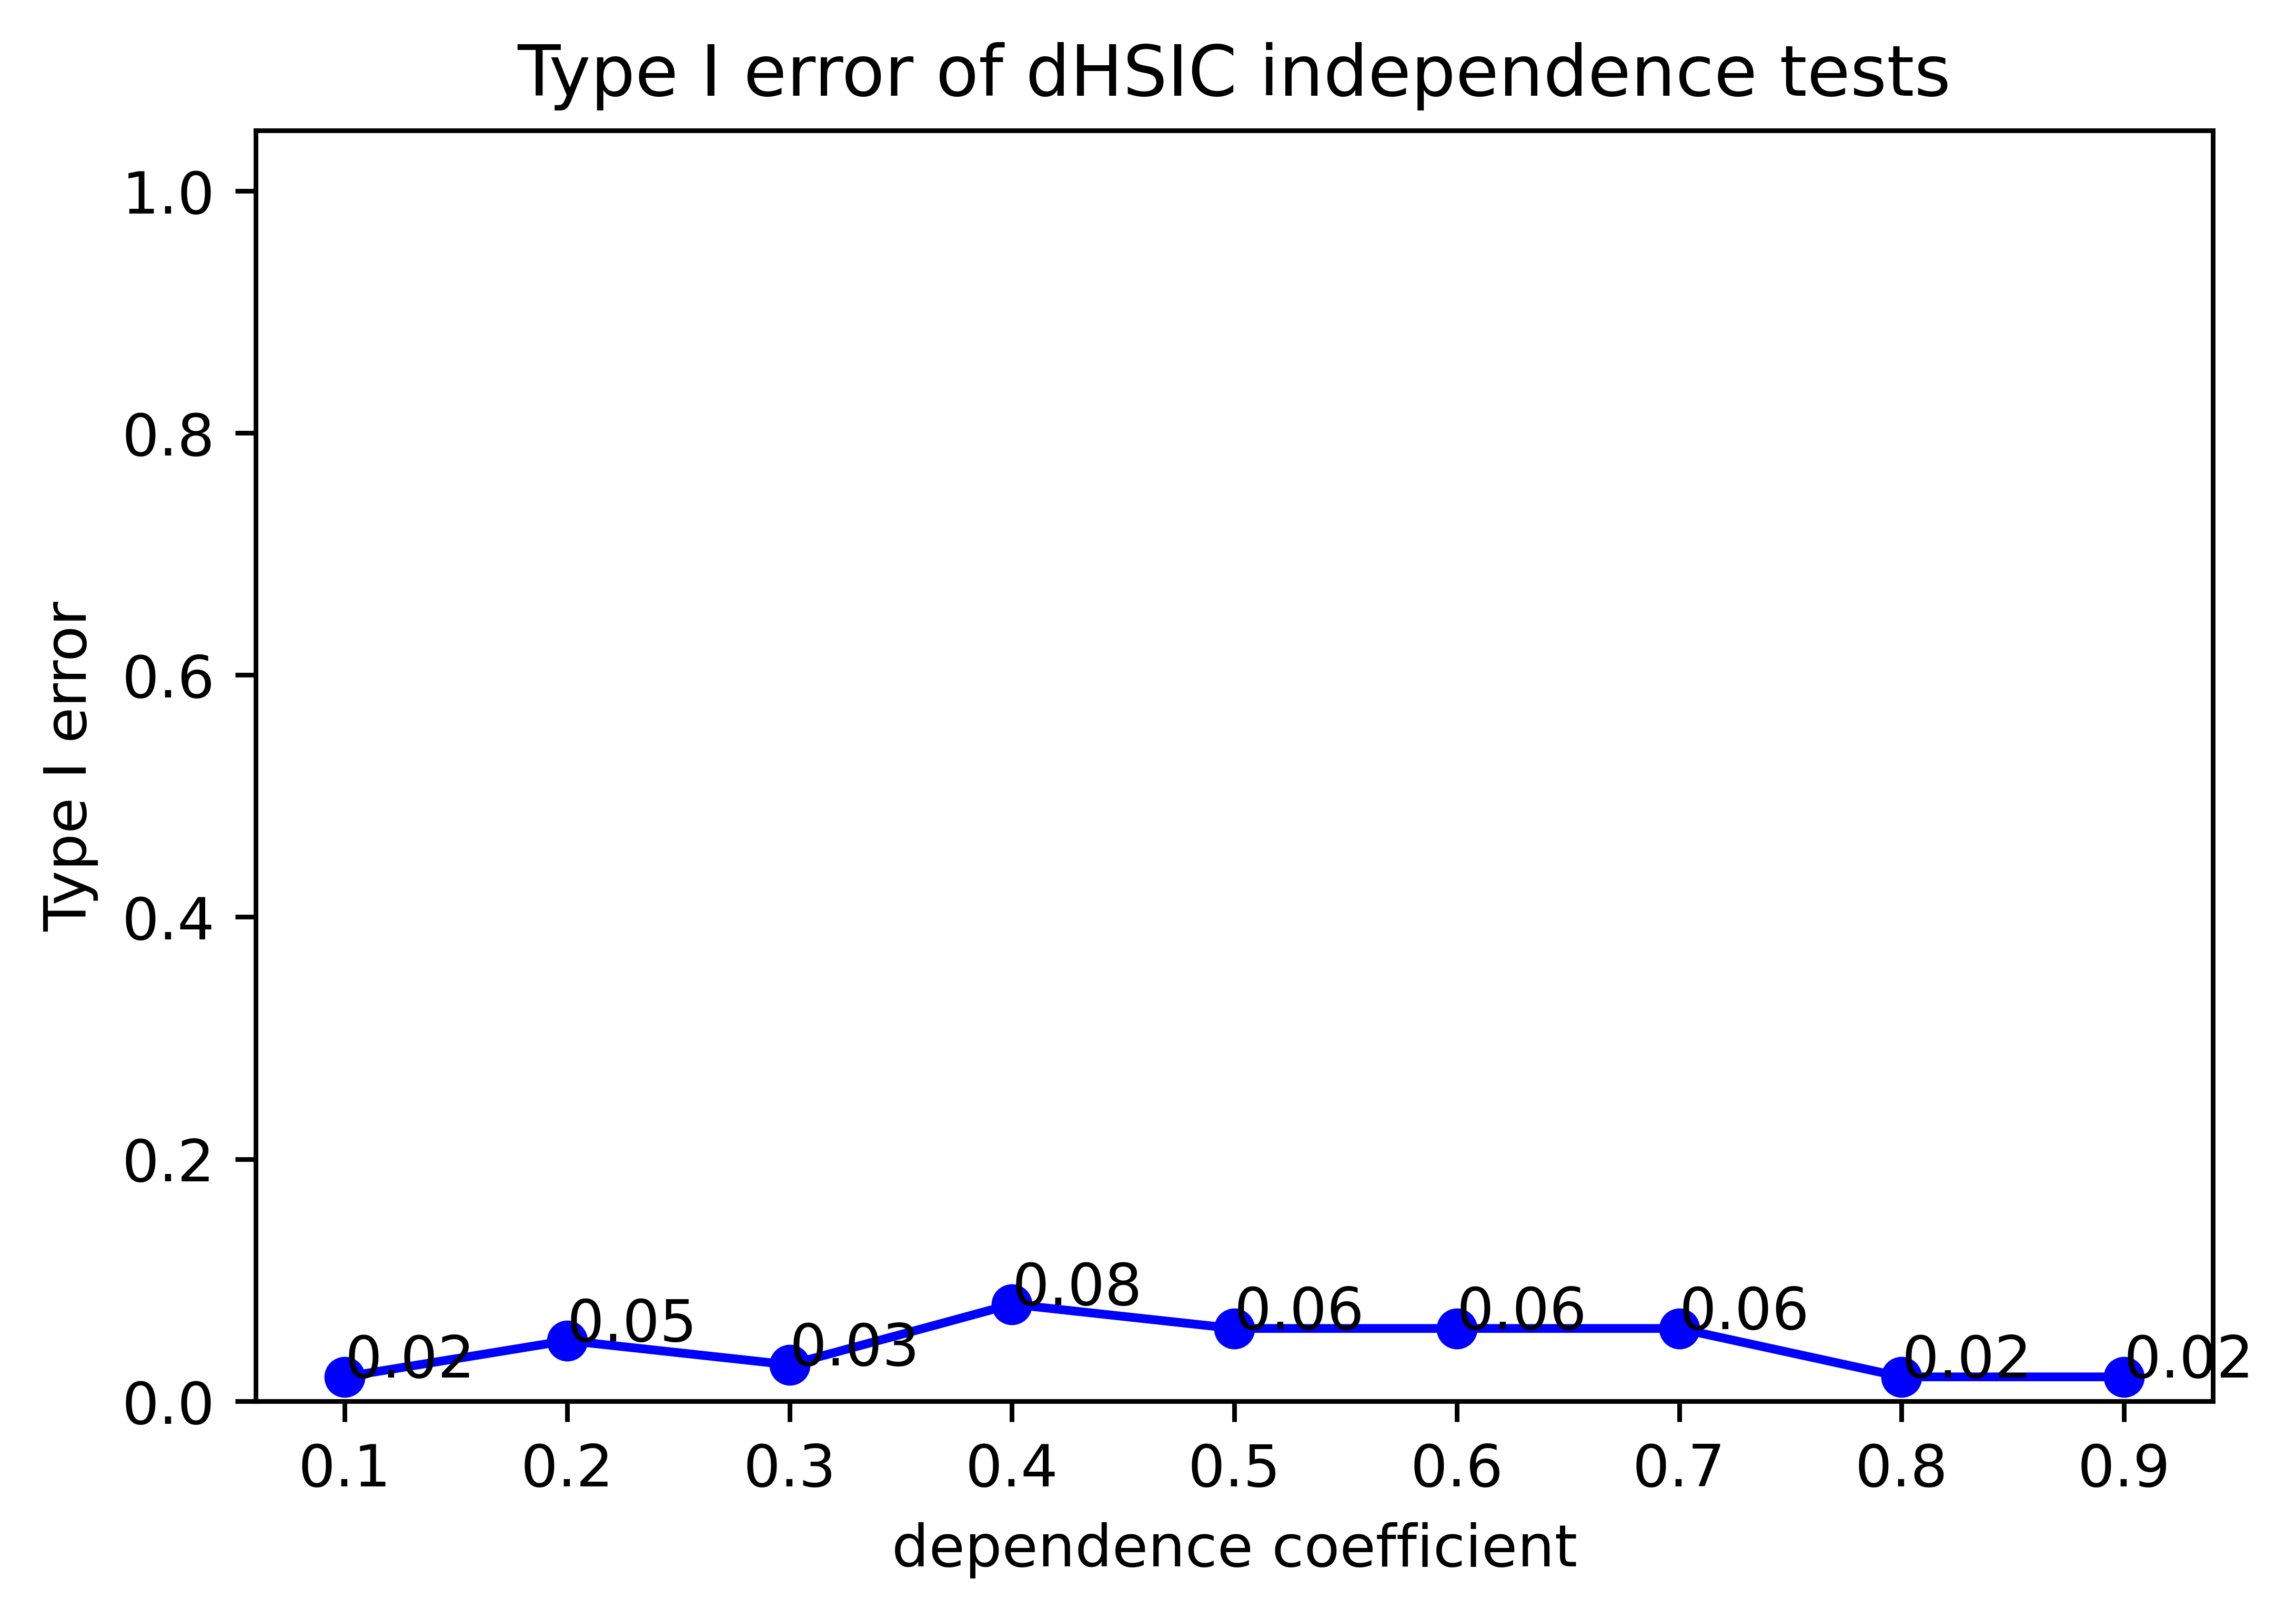

In [20]:
plot_test(list(power_new.values()), 'Type I error')

# tetrahedron

# case1 gt_reject = [1,0,0,0]